<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>

* [0. OBJECTIVES and SCOPE](#0)
* [1. IMPORTING LIBRARIES](#1)
* [2. LOADING DATA](#2)    
* [3. EXPLORATORY DATA ANALYSIS](#3)  
* [4. FINAL CONCLUSIONS and RECOMMENDATIONS](#4)  
* [5. END](#5)

<a id="0"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">OBJECTIVES and SCOPE</p>

<span style="color:#0affef">Questions</span><br><br>
Before performing EDA, we should have a clear objective. So we can make the right questions and the right visualizations.<br>
* [Q1: What types of video titles and thumbnails drive the most traffic?](#101)
* [Q2: What type of content are people engaging with the most or watching the longest?](#102)
* [Q3: What is the SEO applied and what it's the performance?](#103)
* [Q4: Who is the core audience and what are they interested in?](#104)
* [Q5: What types of videos have lead to the most growth and bad growth (subs removed)?](#105)
* [Q6: When the retention peaks happen? what did the youtuber for that peaks? (Important question for SEO-Frame techniques)](#106)
* [Q7: What are the keywords used? These answer to search intents?](#107)
* [Q8: What are the top positive/negative words/sentences in comments?](#108)
* [Q9: What videos produces more relative likes?](#109)
* [Q10: What videos produces more relative dislikes?](#110)
* [Q11: What videos produces more relative comments added?](#111)
* [Q12: What videos generates more social currency? (shares)](#112)
* [Q13: What are the topics of the most liked comments? (clusters)](#113)

<br><br>
<span style="color:#0affef">Objectives</span><br>
<hr>
<span style="color:#0affef">1) Increase video CTR.</span><br>
- Related questions: Q1,Q3,Q4,Q5,Q6,Q7<br>
<hr>
<span style="color:#0affef">2) Increase Subscription Ratio.</span><br>
- Related questions: Q2,Q4,Q5,Q7,Q12.<br>
<hr>
<span style="color:#0affef">3) Increase average watch time and get plain retention [Extend the total youtube session time.].</span> (We need more data from youtube studio, specifically relative retention by video) <br>
- Related questions: Q2!,Q6.<br>
(Note: this is probably the most important objective. The youtube DL algorithm rewards a lot increasing the total session time of a user. But is very hard to determine it with individual user stats).
<hr>
<span style="color:#0affef">4) Find suggestions.</span><br>
- Related questions: Q5, Q8, Q9, Q10, Q13.<br>
<hr>
<span style="color:#0affef">5) Increase interaction.</span><br>
- Related questions: Q3, Q11, Q12.<br>

<hr>
<hr>
Not covered (yet):
* Increase revenue: increase RPM and improve CPM.
- Related questions: Q2,Q6!
* Improve performance in sprint phase (3hours-28days) to evergreen phase (28days+).
- Note: do time series related work may help

X) Others:
- Chatbot for address videos.
- Pulling sentiment from thumbnails and titles and comparing that with performance.
- Recommendation system for increase session time. (Chain interlinking)


<a id="1"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>
[Return to table of contents](#top)

In [ ]:
# Environment variables
path_root = "/home/magody/programming/python/data_science/"
path_data = f"{path_root}data/kenjee_youtube/"
path_output = f"{path_root}output/"

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from textwrap import wrap
from io import BytesIO
from PIL import Image
import urllib.request

from emoji import UNICODE_EMOJI
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

<a id="2"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>
[Return to table of contents](#top)

## Description
1) Aggregated Metrics By Video - This has all the topline metrics from thre channel from its start (around 2015 to Jan 22 2022).
2) Aggregated Metrics By Video with Country and Subscriber Status - This has the same data as aggregated metrics by video, but it includes dimensions for which country people are viewing from and if the viewers are subscribed to the channel or not.
3) Video Performance Over Time - This has the daily data from each of my videos.
4) All Comments - This is all of the comment data gathered from the YouTube API.

## Load

In [ ]:
# CODE: https://www.kaggle.com/ashbellett/data-engineering/notebook
from pathlib import Path        # file paths
from typing import Union        # type hints
import numpy as np              # linear algebra
import pandas as pd             # dataframes
import matplotlib.pyplot as plt # visualisations
import seaborn as sns           # visualisations
from scipy import stats         # statistics

METRICS_SCHEMA = {
    "Video": {
        "name": "video_id",
        "data_type": str
    },
    "Video title": {
        "name": "title",
        "data_type": str
    },
    "Video pub­lish time": {
        "name": "date",
        "data_type": "datetime"
    },
    "Com­ments ad­ded": {
        "name": "comment_count",
        "data_type": int
    },
    "Shares": {
        "name": "share_count",
        "data_type": int
    },
    "Likes": {
        "name": "like_count",
        "data_type": int
    },
    "Dis­likes": {
        "name": "dislike_count",
        "data_type": int
    },
    "Sub­scribers gained": {
        "name": "subscribers_gained",
        "data_type": int
    },
    "Sub­scribers lost": {
        "name": "subscribers_lost",
        "data_type": int
    },
    "Sub­scribers": {
        "name": "net_subscribers",
        "data_type": int
    },
    "Views": {
        "name": "view_count",
        "data_type": int
    },
    "Av­er­age per­cent­age viewed (%)": {
        "name": "average_view_ratio",
        "data_type": float
    },
    "Av­er­age view dur­a­tion": {
        "name": "average_watch_time",
        "data_type": "timedelta"
    },
    "Watch time (hours)": {
        "name": "total_watch_time",
        "data_type": float
    },
    "Im­pres­sions": {
        "name": "impression_count",
        "data_type": int
    },
    "Im­pres­sions click-through rate (%)": {
        "name": "click_through_rate",
        "data_type": float
    },
    "RPM (USD)": {
        "name": "rpm",
        "data_type": float
    },
    "CPM (USD)": {
        "name": "cpm",
        "data_type": float
    },
    "Your es­tim­ated rev­en­ue (USD)": {
        "name": "estimated_revenue",
        "data_type": float
    }
}

COMMENTS_SCHEMA = {
    "Comment_ID": {
        "name": "comment_id",
        "data_type": str
    },
    "Date": {
        "name": "date",
        "data_type": "datetime"
    },
    "VidId": {
        "name": "video_id",
        "data_type": str
    },
    "user_ID": {
        "name": "user_id",
        "data_type": str
    },
    "Comments": {
        "name": "comment_text",
        "data_type": str
    },
    "Reply_Count": {
        "name": "reply_count",
        "data_type": int
    },
    "Like_Count": {
        "name": "like_count",
        "data_type": int
    }
}

PERFORMANCE_SCHEMA_COUNTRY = {
    "Date": {
        "name": "date",
        "data_type": "datetime"
    },
    "Country Code": {
        "name": "country",
        "data_type": str
    },
    "Is Subscribed":{
        "name": "is_subscribed",
        "data_type": bool
    },
    "Video Title": {
        "name": "title",
        "data_type": str
    },
    "External Video ID": {
        "name": "video_id",
        "data_type": str
    },
    "Video Length": {
        "name": "length",
        "data_type": int
    },
    "Thumbnail link": {
        "name": "thumbnail",
        "data_type": str
    },
    "Views": {
        "name": "view_count",
        "data_type": int
    },
    "Video Likes Added": {
        "name": "likes_added",
        "data_type": int
    },
    "Video Dislikes Added": {
        "name": "dislikes_added",
        "data_type": int
    },
    "Video Likes Removed": {
        "name": "likes_removed",
        "data_type": int
    },
    "User Subscriptions Added": {
        "name": "subscribers_gained",
        "data_type": int
    },
    "User Subscriptions Removed": {
        "name": "subscribers_lost",
        "data_type": int
    },
    "Average View Percentage": {
        "name": "average_view_ratio",
        "data_type": float
    },
    "Average Watch Time": {
        "name": "average_watch_time",
        "data_type": float
    },
    "User Comments Added": {
        "name": "comments_added",
        "data_type": int
    }
}



PERFORMANCE_SCHEMA = {
    "Date": {
        "name": "date",
        "data_type": "datetime"
    },
    "Video Title": {
        "name": "title",
        "data_type": str
    },
    "External Video ID": {
        "name": "video_id",
        "data_type": str
    },
    "Video Length": {
        "name": "length",
        "data_type": int
    },
    "Thumbnail link": {
        "name": "thumbnail",
        "data_type": str
    },
    "Views": {
        "name": "view_count",
        "data_type": int
    },
    "Video Likes Added": {
        "name": "likes_added",
        "data_type": int
    },
    "Video Dislikes Added": {
        "name": "dislikes_added",
        "data_type": int
    },
    "Video Likes Removed": {
        "name": "likes_removed",
        "data_type": int
    },
    "User Subscriptions Added": {
        "name": "subscribers_gained",
        "data_type": int
    },
    "User Subscriptions Removed": {
        "name": "subscribers_lost",
        "data_type": int
    },
    "Average View Percentage": {
        "name": "average_view_ratio",
        "data_type": float
    },
    "Average Watch Time": {
        "name": "average_watch_time",
        "data_type": float
    },
    "User Comments Added": {
        "name": "comments_added",
        "data_type": int
    }
}

def typecast_column(column: pd.Series, data_type: Union[type, str]):
    if data_type == 'datetime':
        result = pd.to_datetime(column)
    elif data_type == 'timedelta':
        result = column.apply(lambda row: np.int16(pd.Timedelta(row).seconds))
    elif data_type == int:
        result = column.astype(np.int32)
    elif data_type == float:
        result = column.astype(np.float16)
    else:
        result = column.astype(data_type)
    return result





metrics_column_map = {
    column: METRICS_SCHEMA[column]["name"]
    for column
    in METRICS_SCHEMA.keys()
}

comments_column_map = {
    column: COMMENTS_SCHEMA[column]["name"]
    for column
    in COMMENTS_SCHEMA.keys()
}


performance_country_column_map = {
    column: PERFORMANCE_SCHEMA_COUNTRY[column]["name"]
    for column
    in PERFORMANCE_SCHEMA_COUNTRY.keys()
}

performance_column_map = {
    column: PERFORMANCE_SCHEMA[column]["name"]
    for column
    in PERFORMANCE_SCHEMA.keys()
}

In [ ]:
#Loading the dataset
data1_agg_country_suscriber: pd.DataFrame = pd.read_csv(f"{path_data}Aggregated_Metrics_By_Country_And_Subscriber_Status.csv")
data2_agg_video: pd.DataFrame = pd.read_csv(f"{path_data}Aggregated_Metrics_By_Video.csv")
data3_comments: pd.DataFrame = pd.read_csv(f"{path_data}All_Comments_Final.csv")
data4_video_performance: pd.DataFrame = pd.read_csv(f"{path_data}Video_Performance_Over_Time.csv")

for column in data1_agg_country_suscriber.columns:
    data1_agg_country_suscriber[column] = typecast_column(
        data1_agg_country_suscriber[column],
        PERFORMANCE_SCHEMA_COUNTRY[column]["data_type"]
    )

for column in data2_agg_video.columns:
    data2_agg_video[column] = typecast_column(
        data2_agg_video[column],
        METRICS_SCHEMA[column]["data_type"]
    )
    
for column in data3_comments.columns:
    data3_comments[column] = typecast_column(
        data3_comments[column],
        COMMENTS_SCHEMA[column]["data_type"]
    )
    
for column in data4_video_performance.columns:
    data4_video_performance[column] = typecast_column(
        data4_video_performance[column],
        PERFORMANCE_SCHEMA[column]["data_type"]
    )

data1_agg_country_suscriber.rename(columns=performance_country_column_map, inplace=True)
data2_agg_video.rename(columns=metrics_column_map, inplace=True)
data3_comments.rename(columns=comments_column_map, inplace=True)
data4_video_performance.rename(columns=performance_column_map, inplace=True)


## Eager explotarion

In [ ]:
data1_agg_country_suscriber.info()
data1_agg_country_suscriber.head()

In [ ]:
data2_agg_video.info()
data2_agg_video.head()

In [ ]:
data3_comments.info()
data3_comments.head()

In [ ]:
data4_video_performance.info()
data4_video_performance.head()

<a id="3"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>
[Return to table of contents](#top)

## General

In [ ]:
# Lets check keywords
def get_most_common_keywords(df, label="title", amount=20):

    return Counter(" ".join(df[label]).split()).most_common(amount)

In [ ]:

mean_ctr = data2_agg_video["click_through_rate"].mean()
# mean ctr: 3.08
# mean views: 49716
data2_agg_video.describe()

## Questions

<a id="101"></a>
### Q1: What types of video titles and thumbnails drive the most traffic?

#### Analysis

Both depends on CTR, so we have to get the top videos with higher CTR. Determine which one provided the traffic is very difficult and probably we need more specific data by video, so i will keep things simple.

In [ ]:
"""
naive assumptions:
- everything above to (mean click_through_rate +std) is good traffic
- 1000 are enought data to take decision, use percentiles for more precision
- sort by impressions is irrelevant if we use CTR directly, so, sort by views.
"""
mask1 = (data2_agg_video["view_count"] > 1000) & (data2_agg_video["click_through_rate"] > (mean_ctr + data2_agg_video["click_through_rate"].std()))
mask2 = (data2_agg_video["view_count"] > 1000)

q1_ctr_best = data2_agg_video[mask1].sort_values(["click_through_rate","view_count"], axis=0, ascending=[False,False])
len_q1_ctr_best = len(q1_ctr_best)
q1_ctr_worst = data2_agg_video[mask2].sort_values(["click_through_rate","view_count"], axis=0, ascending=[False,False]).tail(len_q1_ctr_best)

print(len_q1_ctr_best)


In [ ]:
sns.histplot(q1_ctr_best['click_through_rate'], kde=True, linewidth=0)
q1_ctr_best.head(2)

In [ ]:
sns.histplot(q1_ctr_worst['click_through_rate'], kde=True, linewidth=0)
q1_ctr_worst.tail(2)

In [265]:
def parse_q1(df):
    q1_video_id = df["video_id"].values
    q1_titles = df["title"].values
    q1_thumbnails = []
    for i in range(len(q1_video_id)):
        thumbnail = data1_agg_country_suscriber[data1_agg_country_suscriber["video_id"] == q1_video_id[i]].iloc[0]["thumbnail"]
        q1_thumbnails.append(thumbnail)
    q1_thumbnails = np.array(q1_thumbnails)

    return q1_video_id, q1_titles, q1_thumbnails

def request_url_image(url):
    # Adding information about user agent to don't get blocked
    opener=urllib.request.build_opener()
    opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
    urllib.request.install_opener(opener)    
    # calling urlretrieve function to get resource
    img = Image.open(BytesIO(urllib.request.urlopen(url).read()))

    return img

def plot_imgs_grid(rows,cols,titles,images,figsize=(36,28)):

    f, axarr = plt.subplots(5,6, figsize=figsize) # (width,height)

    counter = 0
    for i in range(rows):
        for j in range(cols):
            title = titles[counter].replace("$", "d")  # matplotlib exception with $
            try:
                title = "\n".join(wrap(title, width=30))
            except:
                pass
            axarr[i,j].imshow(images[counter])
            axarr[i,j].set_title(title,fontsize=20)
            counter += 1
    plt.show()

In [ ]:
# retrieve images
q1_video_id_b, q1_titles_b, q1_thumbnails_b = parse_q1(q1_ctr_best)
q1_thumbnails_as_img_b = []
for i in tqdm(range(len(q1_thumbnails_b))):
    q1_thumbnails_as_img_b.append(request_url_image(q1_thumbnails_b[i]))

In [ ]:
q1_video_id_w, q1_titles_w, q1_thumbnails_w = parse_q1(q1_ctr_worst)
q1_thumbnails_as_img_w = []
for i in tqdm(range(len(q1_thumbnails_w))):
    q1_thumbnails_as_img_w.append(request_url_image(q1_thumbnails_w[i]))
# worst to better
q1_video_id_w = q1_video_id_w[::-1]
q1_titles_w = q1_titles_w[::-1]
q1_thumbnails_as_img_w = q1_thumbnails_as_img_w[::-1]

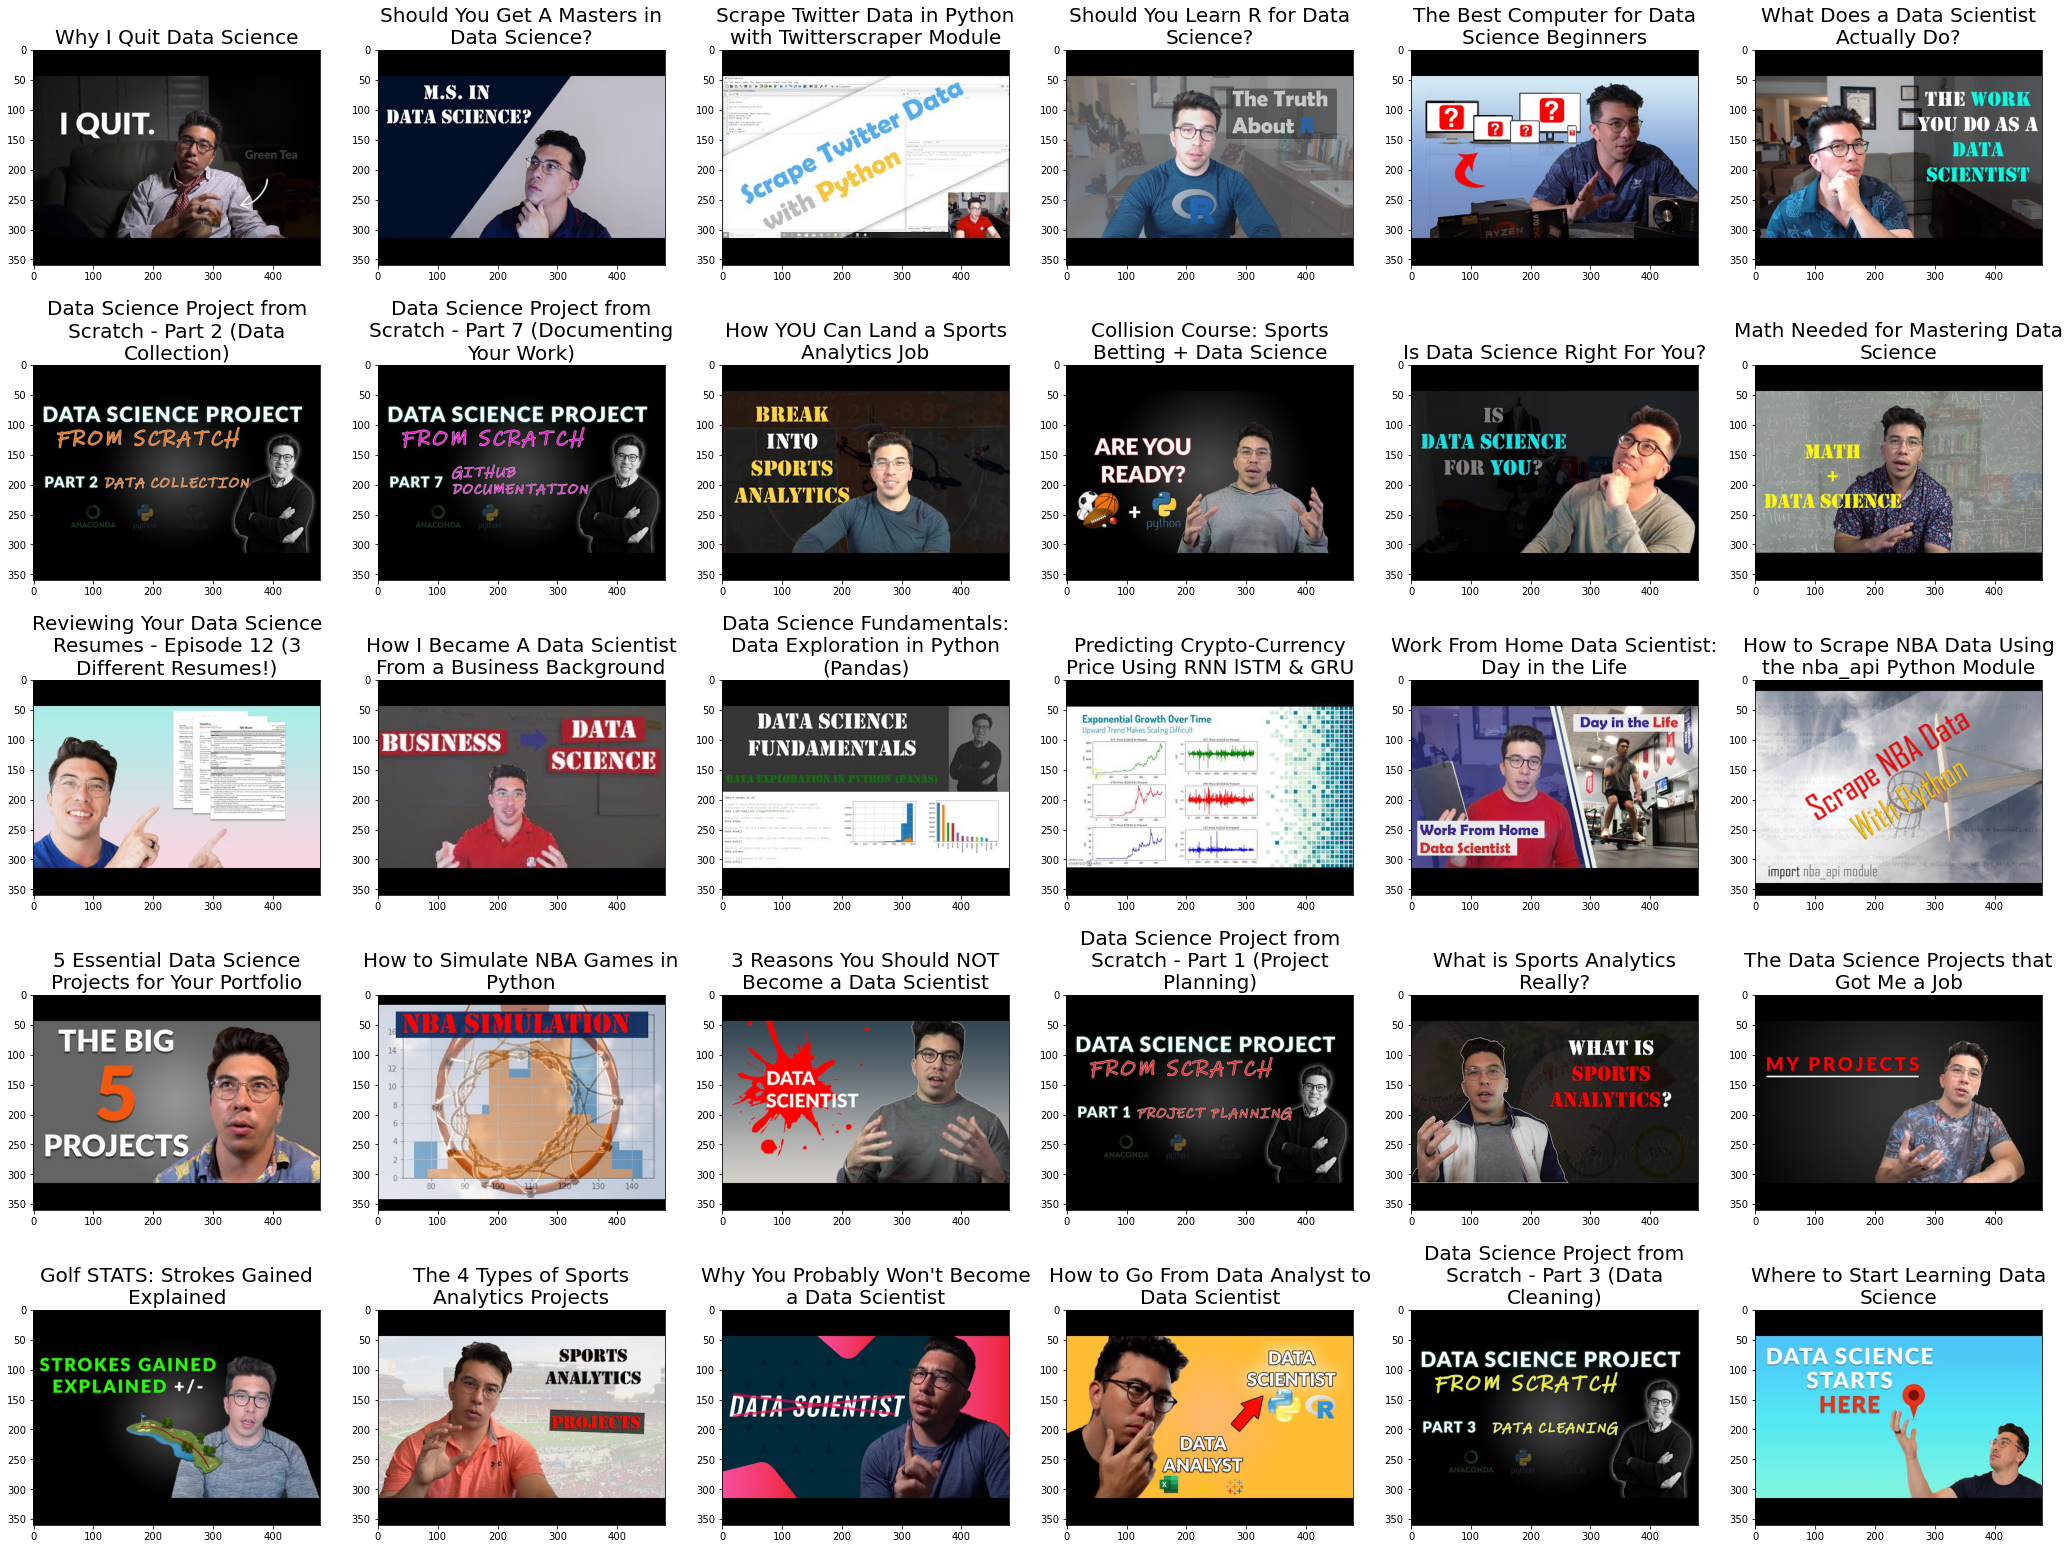

In [266]:
# best title-thumnail combination
plot_imgs_grid(5,6,q1_titles_b,q1_thumbnails_as_img_b)

/home/magody/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127798 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/magody/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127798 missing from current font.
  font.set_text(s, 0, flags=flags)


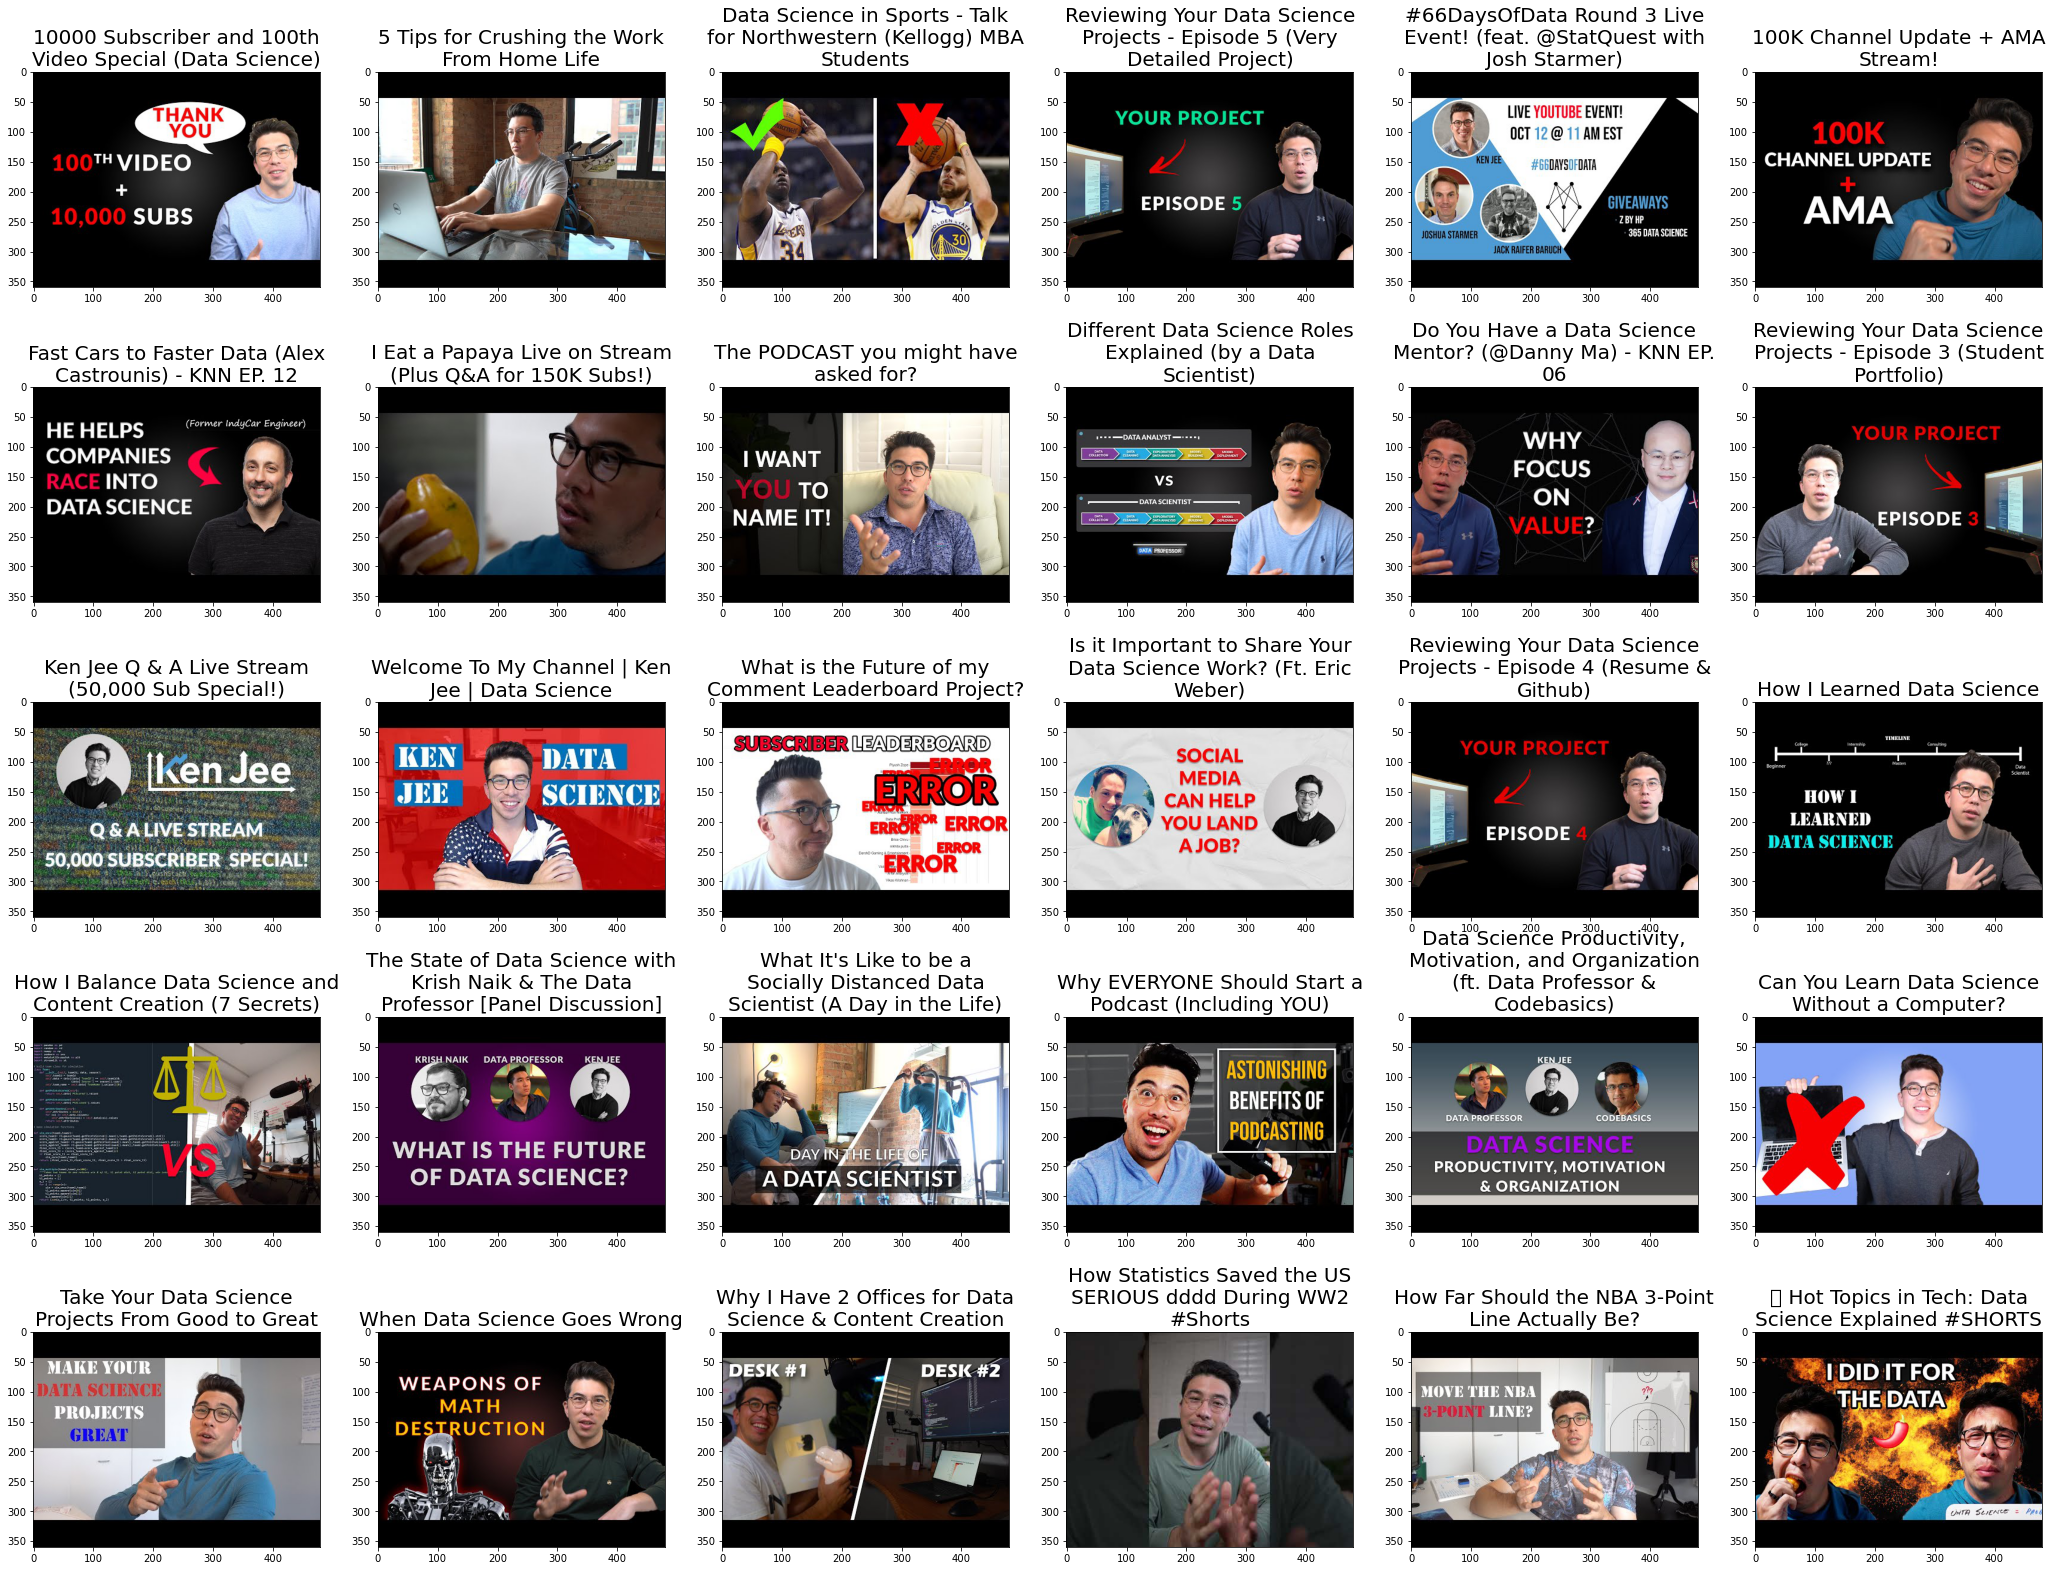

In [267]:
# worst(?) title-thumbnail combination
plot_imgs_grid(5,6,q1_titles_w,q1_thumbnails_as_img_w)

In [38]:
get_most_common_keywords(q1_ctr_best,"title",10)
        

In [ ]:
get_most_common_keywords(q1_ctr_worst,"title",10)

No pattern found, we need advanced algorithms in modeling

#### Conclusion

See [4. FINAL CONCLUSIONS and RECOMMENDATIONS](#4)

<a id="102"></a>
### Q2: What type of content are people engaging with the most or watching the longest?

Note: Time series forecasting may help but, again, i will keep it simple.

#### Analysis

In [54]:
# total_watch_time is not useful, to determine shorts we need the video duration
total_watch_time_percentile_50 = 397.875 # got from data2_agg_video.describe()
maskq2_1 = (data2_agg_video["total_watch_time"] < total_watch_time_percentile_50)  # (data2_agg_video["title"]).apply(lambda s: "#SHORTS" in s) -> can analyze the two short videos
q2_shorts = data2_agg_video[maskq2_1].sort_values(["average_view_ratio","average_watch_time","click_through_rate"],axis=0,ascending=False).loc[:,["video_id","title","average_view_ratio","average_watch_time","view_count", "total_watch_time","click_through_rate"]].head(30)
q2_normal = data2_agg_video[~maskq2_1].sort_values(["average_view_ratio","average_watch_time","click_through_rate"],axis=0,ascending=False).loc[:,["video_id","title","average_view_ratio","average_watch_time","view_count", "total_watch_time","click_through_rate"]].head(30)

In [274]:
# engagging with short consuming time
q2_shorts.loc[:,["title","average_view_ratio","click_through_rate","view_count"],].head(20)

title  average_view_ratio  \
170  Project Presentation - Expectations vs. Realit...            76.62500   
191  How Statistics Saved the US SERIOUS $$$$ Durin...            75.62500   
166          Is Spotify Shuffle Really Random? #Shorts            74.37500   
171  Data Science Project - Expectations vs Reality...            71.93750   
187  Should  @Luke Barousse Take This Data Analyst ...            70.68750   
146                #66DaysOfData - What is it? #shorts            68.12500   
150        What is a lambda function (python)? #shorts            66.56250   
54                   Sh*t Data Scientists Say (Parody)            63.65625   
79   The Secret Data Scientists Don't Want You to Know            61.59375   
74   🌶 Hot Topics in Tech: Data Science Explained #...            60.78125   
221                   IT'S NOT TOO LATE TO LEARN CODE!            60.53125   
220  Most Data Science Hopefuls Overlook This Impor...            58.62500   
116          A Quick Data Science Project Tip! #SHORTS            58.56250   
172                #66DaysOfData - 3 Reasons to Start!            56.84375   
155  Why Right NOW is a Great Time to Learn Data Sc...            56.53125   
219                    Demystifying Data Science Roles            55.56250   
218     Welcome To My Channel | Ken Jee | Data Science            55.43750   
181  Data Science, Machine Learning, and AI: What's...            55.40625   
210               Golf STATS: Strokes Gained Explained            53.81250   
106  5 Unusual Data Science Projects that Will Land...            53.03125   

     click_through_rate  view_count  
170            1.690430        5932  
191            1.610352        3130  
166            1.870117        6579  
171            3.820312       14136  
187            2.640625        2401  
146            2.699219        6101  
150            2.150391        8275  
54             3.750000        8724  
79             4.101562        9503  
74             1.639648        8009  
221            2.650391         721  
220            1.610352         548  
116            2.730469       12328  
172            1.900391        3443  
155            3.009766        4027  
219            2.240234         978  
218            1.009766        1225  
181            4.320312        4722  
210            5.140625        4151  
106            2.919922        7354

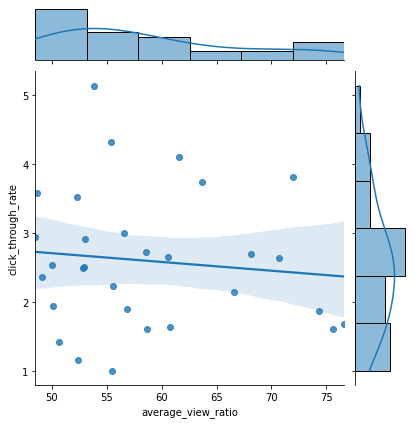

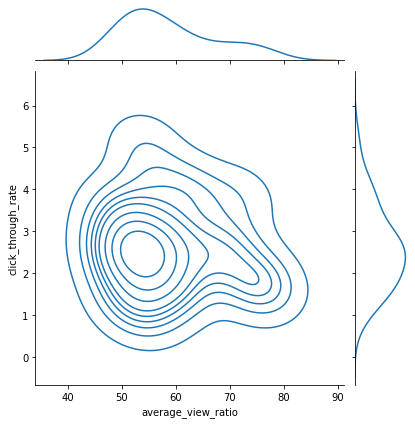

In [71]:
# Evaluating click bait
sns.jointplot(x='average_view_ratio', y='click_through_rate', data=q2_shorts, kind='reg')
sns.jointplot(x='average_view_ratio', y='click_through_rate', data=q2_shorts, kind='kde')

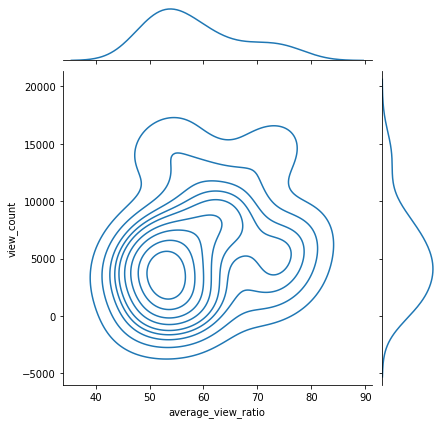

In [72]:
# Evaluating engagging and view count
# Note that the regression line is a little similar as before
sns.jointplot(x='average_view_ratio', y='view_count', data=q2_shorts, kind='kde')

In [275]:
# engagging with normal to long consumming time (These are favorites of youtube, since YT neural network want to extend session time)
q2_normal.loc[:,["title","average_view_ratio","click_through_rate","view_count"],].head(20)

title  average_view_ratio  \
144  What You Need to Know for a Data Science Inter...            54.03125   
105               Should You Learn R for Data Science?            53.40625   
124              The 5 Stages of Learning Data Science            50.43750   
36              Math Needed for Mastering Data Science            49.15625   
69                Where to Start Learning Data Science            49.09375   
113            What Does a Data Scientist Actually Do?            48.62500   
91      Work From Home Data Scientist: Day in the Life            46.78125   
42         Why You're Struggling to Learn Data Science            46.21875   
34    3 Reasons You Should NOT Become a Data Scientist            46.03125   
75           Should You Get A Masters in Data Science?            45.21875   
59   We Need to Talk About The LinkedIn Machine Lea...            45.09375   
163        The Data Science Projects that Got Me a Job            44.96875   
62   How Zillow Lost $500 MILLION With Machine Lear...            44.62500   
121  I Wish I Had Known THIS Before Starting in Dat...            44.40625   
193              My Top 5 Data Science Internship Tips            44.37500   
120                   What is Sports Analytics Really?            44.12500   
88   Kaggle vs Github - Which is Best for Your Data...            43.37500   
104  My First Data Science Contracting Side-Gig (Ho...            43.21875   
44   How I Chose My Masters Degree for Breaking int...            43.15625   
66                   How Data Science Projects Pay Off            43.06250   

     click_through_rate  view_count  
144            4.550781       12317  
105            7.449219       15243  
124            3.650391       15398  
36             5.800781       48401  
69             4.781250       16882  
113            6.601562       25402  
91             5.570312       26586  
42             3.449219       14552  
34             5.410156       93329  
75             8.398438       18488  
59             3.320312       11808  
163            5.191406       33396  
62             2.630859       16933  
121            4.000000       23397  
193            4.531250        8420  
120            5.210938       13322  
88             2.890625        8832  
104            3.640625        8643  
44             3.400391       18633  
66             3.330078        9342

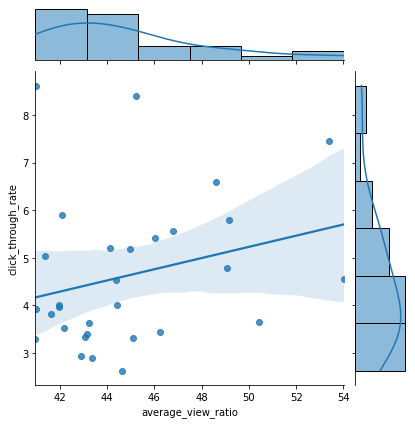

In [61]:
# Evaluating click bait
sns.jointplot(x='average_view_ratio', y='click_through_rate', data=q2_normal, kind='reg')

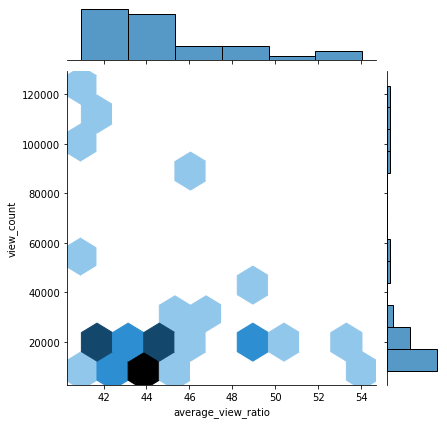

In [63]:
# Evaluating engagging and view count
# Note that the regression line goes from up to down instead of down to up
sns.jointplot(x='average_view_ratio', y='view_count', data=q2_normal, kind='hex')

#### Conclusion

Engaged in short video with the topics:
- Expectations vs. Reality.
- The Secret...
- Quick tip of general data science
- Fundamentals concepts (Data Science, Machine Learning, and AI).

Engaged in long video with the topics:
- 3 Reasons... (Numbers + tips of data science)
- Things needed to start to do data science.
- Experience tips (Example: i wish i had known)

<a id="103"></a>
### Q3: What is the SEO applied and what it's the performance?

For now, i will only analize the titles. Other Seo-Techniques will be ignored since require a really specific analisis by video.

Seo-Title.- every "r" is optional of course (except r1):
- r1: Have one or more psychological triggers (curiosity,fear,utility,urgency)
- r2: Capture the attention with ASCII: +,-,[],(),!,?
- r3: Break the pattern with respect to other videos of similar subject matter.
- r4: Numbers usage in title if it can
- r5: Have action verbs
- r6: Have emojis 1-2,
- r7: Selective uppercase (Example: This is what YOU want...)

#### Analysis

In [277]:
def score_r1(text):
    title = f"{text.lower()}"
    score = [0,0,0,0]
    # some, name all triggers is about 1 millon of frases
    # i base this on spanish triggers, english may differ just a little
    # 0=curiosity, 1=fear, 2=utility, 3=urgency
    # include some niche words?
    triggers = {
        0: ["secret","top","need","life","what","why","where","when","bought", "and this happened", "reveal", "discover", "won't believe it", "surprise", "interest", "you don't know","reasons"],
        1: ["loss","care", "danger", "attention", "error", "problem", "trap", "scam", "ban", "forbidden"],
        2: ["best","how", "easy", "step","fast","trick","tip","strategy","definitive","proven","works","you", "you must","beginners","course","data science","data scientist","project","faang","maang"],
        3: ["urgent","now","hurry","limited","last","chance","free","actual","2017","2018","2019","2020","2021","2022"]
    }

    # python string search uses KMP similar algorithm so brute force it's ok (maybe)
    for key,array in triggers.items():
        for keyword in array:
            if keyword in title:
                score[key] += 1
    return score

def score_r2(text):
    title = f"{text.lower()}"
    score = 0
    ascii_common = ["!", "?", "+"]
    for ac in ascii_common:
        if ac in title:
            score += 0.5

    return score


def score_r3(text):
    title = f"{text.lower()}"
    # we need ML and more data from other youtubers. So ignore
    # Even better, do specific human analysis.
    return 0

def score_r4(text):
    title = f"{text.lower()}"
    score = 0
    # favorite numbers for seo: 1-3-5-7-10-12-15 multiples
    # worst seo numbers 2-4-6
    numbers = [f"{i} " for i in range(0,10)]
    for number in numbers:
        if number in title:
            score += 1
            if number in ["1 ","3 ","5 ","7 "]:
                score += 1
            break

    return score

def score_r5(text):
    title = f"{text.lower()}"
    score = 0
    # some with some niche words
    action_verbs = ["scrape", "in python","win ","learn", "discover", "control", "create", "find", "teach", "shows", "demonstrates", "rid", "imagine", "improve", "want", "get", "fulfill", "order", "organize"]

    for av in action_verbs:
        if av in title:
            score += 1

    return score

def score_r6(text):
    title = f"{text.lower()}"
    score = 0
    for emoji in UNICODE_EMOJI["en"]:
        score += title.count(emoji)

    if score > 4:
        score = -1

    return score

# r7 ignored

# sanity check
print(score_r1("REVEALED ML trick for this actual CRYPTO winter!"))
print(score_r2("REVEALED ML trick for this CRYPTO winter!"))
# print(score_r3("REVEALED ML trick this actual CRYPTO winter!"))
print(score_r4("3 ML tricks to win money in this CRYPTO winter!"))
print(score_r5("LEARN this ML trick for CRYPTO winter!"))
print(score_r6("100 For 😘 ◼️ YouTube 🚀!!"))

[1, 0, 1, 1]
0.5
2
1
4


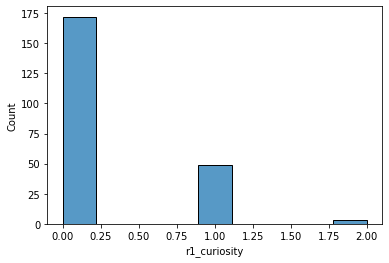

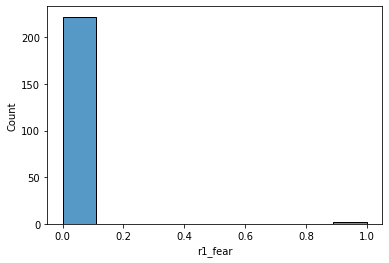

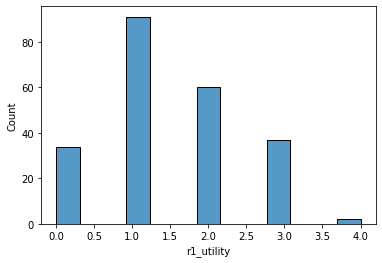

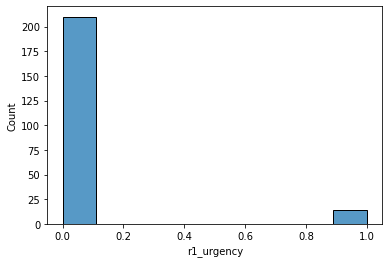

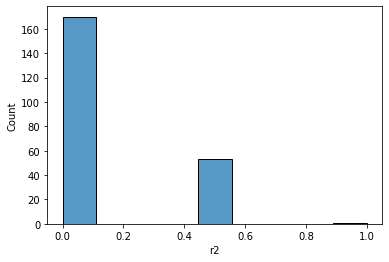

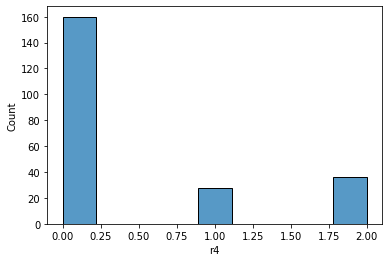

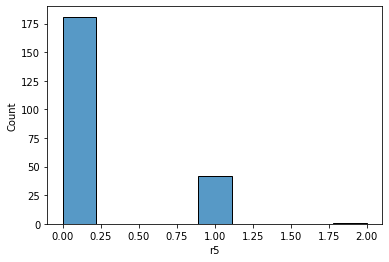

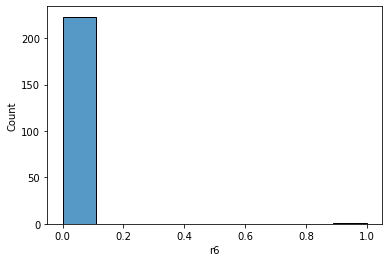

In [278]:
cols_scores_r = ["r1_curiosity","r1_fear","r1_utility","r1_urgency","r2","r4","r5","r6"]
title_score_r1 = data2_agg_video["title"].apply(score_r1)
data2_agg_video["r1_curiosity"] = title_score_r1.apply(lambda array: array[0])
data2_agg_video["r1_fear"] = title_score_r1.apply(lambda array: array[1])
data2_agg_video["r1_utility"] = title_score_r1.apply(lambda array: array[2])
data2_agg_video["r1_urgency"] = title_score_r1.apply(lambda array: array[3])
data2_agg_video["r2"] = data2_agg_video["title"].apply(score_r2)
data2_agg_video["r4"] = data2_agg_video["title"].apply(score_r4)
data2_agg_video["r5"] = data2_agg_video["title"].apply(score_r5)
data2_agg_video["r6"] = data2_agg_video["title"].apply(score_r6)

for c in cols_scores_r:
    sns.histplot(data2_agg_video[c])
    plt.show()

In [280]:
data2_agg_video["final_score"] = data2_agg_video.loc[:, cols_scores_r].sum(axis=1)
data2_agg_video.sort_values(["final_score","click_through_rate"], axis=0, ascending=[False,False],inplace=True)
data2_agg_video.loc[:,["title","click_through_rate","final_score","view_count"]].head(20)

title  click_through_rate  \
12   How I Would Learn Data Science in 2021 (What H...            3.929688   
137  Reviewing Your Data Science Projects - Episode...            2.929688   
13   3 Proven Data Science Projects for Beginners (...            4.011719   
112  How To Learn Programming for Data Science [3 S...            4.011719   
71   Data Science Project from Scratch - Part 7 (Do...            6.179688   
26   5 Essential Data Science Projects for Your Por...            5.449219   
34    3 Reasons You Should NOT Become a Data Scientist            5.410156   
209           My Top 5 Data Science Resources for 2019            4.679688   
144  What You Need to Know for a Data Science Inter...            4.550781   
193              My Top 5 Data Science Internship Tips            4.531250   
79   The Secret Data Scientists Don't Want You to Know            4.101562   
162  Reviewing Your Data Science Projects - Episode...            3.400391   
32   How I Would Learn Data Science in 2022 (If I H...            3.310547   
127  Reviewing Your Data Science Projects - Episode...            2.990234   
106  5 Unusual Data Science Projects that Will Land...            2.919922   
141  Reviewing Your Data Science Projects - Episode...            2.910156   
81   Reviewing Your Data Science Projects - Episode...            2.679688   
82   Find a Data Science Project With These 3 Techn...            2.509766   
142  Reviewing Your Data Science Projects - Episode...            2.429688   
154  Reviewing Your Data Science Projects - Episode...            2.380859   

     final_score  view_count  
12           7.5      123515  
137          6.5        9384  
13           6.0      237467  
112          6.0       25616  
71           5.0       12427  
26           5.0       51092  
34           5.0       93329  
209          5.0        3406  
144          5.0       12317  
193          5.0        8420  
79           5.0        9503  
162          5.0        7705  
32           5.0       79283  
127          5.0        8778  
106          5.0        7354  
141          5.0        7480  
81           5.0        5106  
82           5.0       13931  
142          5.0        4470  
154          5.0        5504

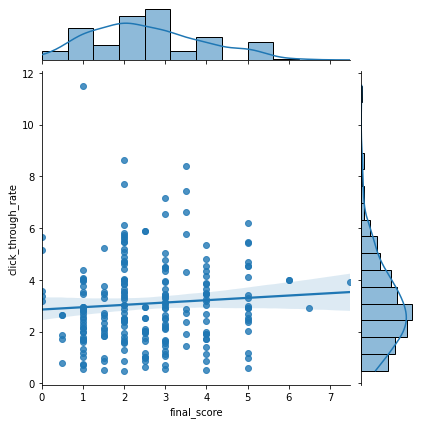

In [186]:
sns.jointplot(x="final_score",y="click_through_rate",data=data2_agg_video,kind="reg")

#### Conclusion

The relation is linear positive correlated. When the channel applied some seo improves. This gives a very special insights because the expected improvement should be better:
- The best videos are visited by people who want just consume a tutorial and then leave the channel.
- In this videos we have to redirect to the videos with highest Subscription Rate to "fish them". And this should happen in a retention peak (no data yet to check where happen). See Q5.
- Data Science/Beginner/Start and escencially curiosity triggers in the title have some power.
- Triggers most used: utility and curiosity.
- Triggers less often: urgency and fear.
- The mayority of videos don't use deep triggers! only utility general triggers.
- Exist special ASCII usage in the 25% of videos.
- The numbers in titles improved CTR.
- The call to action (action verbs) are low.
- The use of emojis is almost scarce.
- Even if the relation final_score x CTR is linear and positive. This doesn't mean that using the SEO improved the CTR, but definitely helps.

<a id="104"></a>
### Q4: Who is the core audience and what are they interested in?

We need the labels or tags of videos. Anyway, we can do clusterization too.

#### Analysis

In [385]:
# First analyze contry data
country_top10_view = data1_agg_country_suscriber.sort_values(["view_count"],ascending=False,axis=0).head(10)
country_top10_sub_gained = data1_agg_country_suscriber.sort_values(["subscribers_gained"],ascending=False,axis=0).head(10)
country_top10_sub_average_view_ratio = data1_agg_country_suscriber.sort_values(["average_view_ratio"],ascending=False,axis=0).head(10)

<AxesSubplot:xlabel='country', ylabel='view_count'>

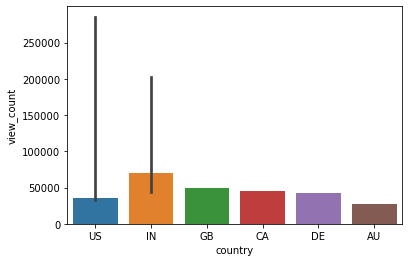

In [386]:
sns.barplot(x="country",y="view_count",data=country_top10_view, estimator=np.median)

<AxesSubplot:xlabel='country', ylabel='subscribers_gained'>

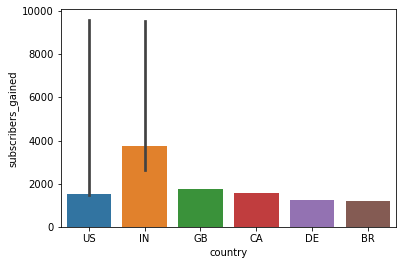

In [387]:
sns.barplot(x="country",y="subscribers_gained",data=country_top10_sub_gained, estimator=np.median)

<AxesSubplot:xlabel='country', ylabel='average_view_ratio'>

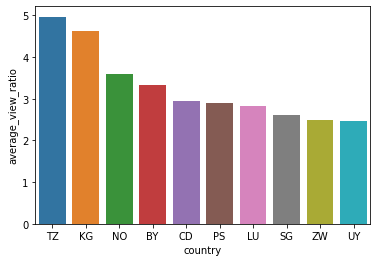

In [388]:
sns.barplot(x="country",y="average_view_ratio",data=country_top10_sub_average_view_ratio, estimator=np.median)

In [281]:
q4 = data2_agg_video["title"].values
print(len(q4))
vectorizer = TfidfVectorizer(stop_words={'english'}) # TF-IDF > Counting method
X_q4 = vectorizer.fit_transform(q4)

224


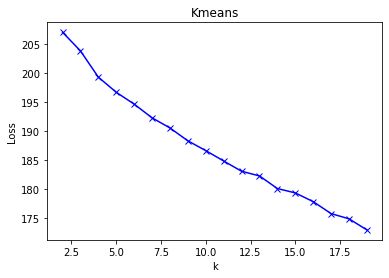

In [292]:
score = []
K = range(2,20)
for k in K:
   model = KMeans(n_clusters=k, max_iter=200, n_init=10)
   model = model.fit(X_q4)
   score.append(model.inertia_)
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()

KMeans can't determine the topics. So lets pick any number. Gaussian mixture can do it better?

<AxesSubplot:xlabel='clusters', ylabel='Count'>

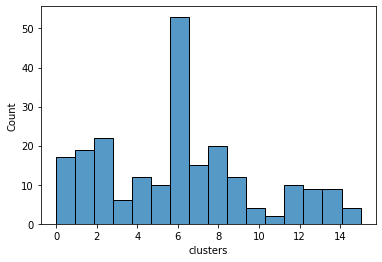

In [294]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=16)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X_q4.toarray())
data2_agg_video["clusters"] = yhat_AC
sns.histplot(data2_agg_video["clusters"],bins=16)

<AxesSubplot:xlabel='clusters', ylabel='Count'>

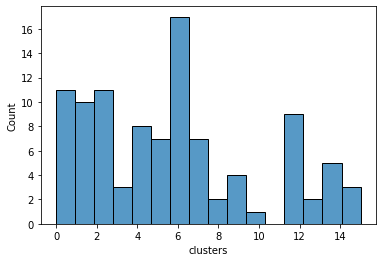

In [305]:
"""
Naive assumption:
- A subscriber is interested in, if suscribes
- A subscriber is interested in, if clicks the video.
- click_through_rate > subscribers_gained? That depends on the objective. If loyalty is more important, then subscribers_gained is better
"""
q4_top100 = data2_agg_video.sort_values(['click_through_rate','subscribers_gained'],ascending=False,axis=0).head(100)
sns.histplot(q4_top100["clusters"],bins=16)

In [307]:
q4_top100[q4_top100["clusters"] == 6].loc[:,["title","subscribers_gained","click_through_rate"]].head(11)

title  subscribers_gained  \
223                     ProjectDemoCSC478_UFCFightData                   0   
138  Predicting Crypto-Currency Price Using RNN lST...                 111   
210               Golf STATS: Strokes Gained Explained                  43   
17   Beginner Kaggle Data Science Project Walk-Thro...                2585   
93   How to Set Up Your Data Science Environment (A...                1207   
188                        Data Science: Pros and Cons                  44   
204  Predicting Season Long NBA Wins Using Multiple...                  34   
121  I Wish I Had Known THIS Before Starting in Dat...                 274   
143  How to Stay Productive & Motivated When Learni...                 132   
54                   Sh*t Data Scientists Say (Parody)                  20   
104  My First Data Science Contracting Side-Gig (Ho...                 121   

     click_through_rate  
223           11.507812  
138            5.648438  
210            5.140625  
17             4.710938  
93             4.488281  
188            4.070312  
204            4.031250  
121            4.000000  
143            3.880859  
54             3.750000  
104            3.640625

In [308]:
q4_top100[q4_top100["clusters"] == 0].loc[:,["title","subscribers_gained","click_through_rate"]].head(11)

title  subscribers_gained  \
21   Scrape Twitter Data in Python with Twitterscra...                 365   
190  How I Became A Data Scientist From a Business ...                  81   
91      Work From Home Data Scientist: Day in the Life                 418   
84   How to Scrape NBA Data Using the nba_api Pytho...                 210   
158                How to Simulate NBA Games in Python                 152   
48       How to Go From Data Analyst to Data Scientist                 613   
27   How to Build a Data Science Portfolio Website ...                 524   
38   How to Make A Data Science Portfolio Website w...                1234   
44   How I Chose My Masters Degree for Breaking int...                 184   
43                      How to ULTRALEARN Data Science                2136   
55   How I Use Data to Optimize My Life | What I Co...                  66   

     click_through_rate  
21             7.710938  
190            5.718750  
91             5.570312  
84             5.480469  
158            5.449219  
48             4.898438  
27             4.628906  
38             3.949219  
44             3.400391  
43             3.300781  
55             3.019531

In [309]:
q4_top100[q4_top100["clusters"] == 2].loc[:,["title","subscribers_gained","click_through_rate"]].head(11)

title  subscribers_gained  \
75           Should You Get A Masters in Data Science?                  81   
33             How YOU Can Land a Sports Analytics Job                1860   
109  Reviewing Your Data Science Resumes - Episode ...                 207   
163        The Data Science Projects that Got Me a Job                 718   
145           The 4 Types of Sports Analytics Projects                 526   
140        5 Sports Analytics Books to Get You Started                 135   
119  How To Get Data Science Experience (Without a ...                 603   
99   How I Got My First Data Science Internship (An...                 505   
29   The Projects You Should Do To Get A Data Scien...                2793   
178  Sports Analytics 101: The Pythagorean Theorem ...                  89   
25   How to Get a Data Science Job at FAANG (@Data ...                 142   

     click_through_rate  
75             8.398438  
33             6.121094  
109            5.761719  
163            5.191406  
145            5.058594  
140            4.519531  
119            4.500000  
99             4.441406  
29             4.359375  
178            3.580078  
25             3.500000

#### Conclusion

Note: focus in CTR is different than focus on loyalty. I focused on CTR. Kmeans couldn't separate accurately the clusters, but made a great job.
- Most important cluster (topics of channel): 6,0,2
- Cluster 6: is about tutorial related.
- Cluster 0: is about data science life: portfolio, degree, daily, learning, etc.
- Cluster 2: is about job and resume.


<a id="105"></a>
### Q5: What types of videos have lead to the most growth and bad growth (subs removed)? 

#### Analysis

In [316]:
data2_agg_video["sr_relative"] = (data2_agg_video["subscribers_gained"]/data2_agg_video["view_count"]) * 100
data2_agg_video["sr_balance"] = (data2_agg_video["subscribers_gained"] - data2_agg_video["subscribers_lost"])
data2_agg_video["sr_balance_relative"] =  (data2_agg_video["sr_balance"]/data2_agg_video["view_count"]) * 100

q5_sr = data2_agg_video.sort_values(["sr_relative","view_count"],ascending=[False,False],axis=0)
q5_sr_plus = data2_agg_video.sort_values(["sr_balance_relative","view_count"],ascending=[False,False],axis=0)
q5_sr_minus = data2_agg_video.sort_values(["sr_balance_relative","view_count"],ascending=[True,False],axis=0)

In [319]:
# These are target videos. From videos with high CTR and views put a card linkin to this videos, so the no suscribed will be converted.
# ignore the total row (nan title)
q5_sr.loc[:,["title","sr_relative","subscribers_gained","click_through_rate"]].head(11)

title  sr_relative  \
37                          What is the #66DaysOfData?     4.525614   
0                                                  nan     4.116756   
13   3 Proven Data Science Projects for Beginners (...     4.003925   
4            Why I'm Starting Data Science Over Again.     3.948430   
43                      How to ULTRALEARN Data Science     3.861451   
218     Welcome To My Channel | Ken Jee | Data Science     3.836735   
1    How I Would Learn Data Science (If I Had to St...     3.741667   
33             How YOU Can Land a Sports Analytics Job     3.683314   
7    The Best Free Data Science Courses Nobody is T...     3.611442   
32   How I Would Learn Data Science in 2022 (If I H...     3.220110   
41   Data Science Project from Scratch - Part 1 (Pr...     3.095650   

     subscribers_gained  click_through_rate  
37                 2395            3.439453  
0                229241            3.160156  
13                 9508            4.011719  
4                  1957            4.011719  
43                 2136            3.300781  
218                  47            1.009766  
1                 46904            3.140625  
33                 1860            6.121094  
7                 10734            3.240234  
32                 2553            3.310547  
41                 3184            5.351562

In [324]:
q5_sr_plus.loc[:,["title","sr_balance_relative","sr_balance","click_through_rate"]].head(11)

title  sr_balance_relative  \
37                          What is the #66DaysOfData?             4.463257   
13   3 Proven Data Science Projects for Beginners (...             3.973605   
4            Why I'm Starting Data Science Over Again.             3.867727   
218     Welcome To My Channel | Ken Jee | Data Science             3.836735   
43                      How to ULTRALEARN Data Science             3.827102   
1    How I Would Learn Data Science (If I Had to St...             3.705689   
33             How YOU Can Land a Sports Analytics Job             3.651630   
7    The Best Free Data Science Courses Nobody is T...             3.567367   
0                                                  nan             3.294450   
32   How I Would Learn Data Science in 2022 (If I H...             3.162090   
41   Data Science Project from Scratch - Part 1 (Pr...             3.074261   

     sr_balance  click_through_rate  
37         2362            3.439453  
13         9436            4.011719  
4          1917            4.011719  
218          47            1.009766  
43         2117            3.300781  
1         46453            3.140625  
33         1844            6.121094  
7         10603            3.240234  
0        183451            3.160156  
32         2507            3.310547  
41         3162            5.351562

In [325]:
q5_sr_minus.loc[:,["title","sr_balance_relative","sr_balance","click_through_rate"]].head(11)

title  sr_balance_relative  \
182  I Eat a Papaya Live on Stream (Plus Q&A for 15...            -0.924703   
6      Ken Jee Q & A Live Stream (50,000 Sub Special!)            -0.214961   
2                    100K Channel Update + AMA Stream!            -0.130947   
170  Project Presentation - Expectations vs. Realit...            -0.033715   
187  Should  @Luke Barousse Take This Data Analyst ...             0.000000   
30   Fast Cars to Faster Data (Alex Castrounis) - K...             0.000000   
223                     ProjectDemoCSC478_UFCFightData             0.000000   
92              Is Your Phone REALLY Listening to You?             0.021887   
19   Do You Have a Data Science Mentor? (@Danny Ma)...             0.045704   
107              The PODCAST you might have asked for?             0.054466   
94      My Daily Battle With Time - Will I Win? [Vlog]             0.055325   

     sr_balance  click_through_rate  
182         -21            0.799805  
6            -5            0.979980  
2            -3            0.720215  
170          -2            1.690430  
187           0            2.640625  
30            0            0.759766  
223           0           11.507812  
92            1            1.950195  
19            1            0.959961  
107           1            0.850098  
94            2            1.719727

#### Conclusion

- (q5_sr) are target videos. From videos with high CTR and views put a card linking to these videos, so the no suscribed will be converted. By probability.
- The videos that get more subs are about: beginner instroduction to data cience, experience if hat to start again, recommendations.
- The videos that get more un-subs are about: Q&A, channel announcements.

<a id="106"></a>
### Q6: When the retention peaks happen? what did the youtuber for that peaks? (Important question for SEO-Frame technique)

We dont have enough data to answer this

<a id="107"></a>
### Q7: What are the keywords used? These answer to search intents?

#### Analysis

In [326]:
get_most_common_keywords(data2_agg_video,"title",20)

[('Data', 182),
 ('Science', 132),
 ('-', 59),
 ('to', 39),
 ('a', 38),
 ('How', 35),
 ('Your', 33),
 ('Projects', 29),
 ('The', 26),
 ('I', 25),
 ('in', 23),
 ('Episode', 23),
 ('for', 22),
 ('Reviewing', 21),
 ('You', 21),
 ('the', 21),
 ('Project', 18),
 ('My', 18),
 ('KNN', 16),
 ('EP.', 16)]

Let's search in google "Data science,Projects," and get some intent search. The "People also ask" are recurrent search intents from people that is looking for something specific.

Results obtained in google for Data Science:

People also ask
- Is Data Science a good career?
- Is Data Science hard?
- Who is eligible for Data Science?
- Is data science a safe job?
- Is data science a stressful job?
- Which job is the richest job?
- What jobs do most billionaires have?

Results obtained in google for "Data Science * projects":
People also ask
- What projects should I do for data science?
- How do I start a data analytics project?






#### Conclusion

- The keywords are only a few. Is very important to expand this with "mainstream" topics. More details in final conclusions and recommendations section.
- K.J. cover most of the search intents for data science. So, he probably want to solve more search intents of other keywords.

<a id="108"></a>
### Q8: What are the top positive/negative words/sentences in comments?

We can train a classifier but meh, is easy and already someone did it probably much better...

#### Analysis

In [328]:
def label_sentiment(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    if neg > pos:
        return -neg
    elif pos > neg:
        return pos
    return 0

# expected time 1min processing
data3_comments["sentiment"] = data3_comments["comment_text"].apply(label_sentiment)


In [329]:
is_negative = (data3_comments["sentiment"] < 0)
comments_positive = data3_comments[~is_negative].loc[:,["comment_id","comment_text", "sentiment"]]
comments_negative = data3_comments[is_negative].loc[:,["comment_id", "comment_text", "sentiment"]]
print(f"Positive: {len(comments_positive)}, Negative: {len(comments_negative)}")

Positive: 9465, Negative: 775


In [222]:
# should we remove stop words? todo#
get_most_common_keywords(comments_positive,"comment_text",100)[-60:-50]

[('was', 986),
 ('how', 981),
 ('just', 964),
 ('what', 918),
 ('not', 911),
 ('Thank', 905),
 ('if', 871),
 ('more', 868),
 ('get', 865),
 ('will', 843)]

In [224]:
# should we remove stop words? todo#
get_most_common_keywords(comments_negative,"comment_text",100)[-60:-50]

[('if', 85),
 ('at', 79),
 ('error', 78),
 ('Data', 76),
 ('about', 73),
 ('how', 71),
 ('will', 71),
 ('really', 69),
 ('like', 68),
 ('all', 63)]

In [335]:
comments_positive.sort_values(["sentiment"],ascending=False,axis=0).head(20)

comment_id   comment_text  sentiment
3893   UgxTKZA9Qgx0KkNQFUt4AaABAg         Thanks        1.0
148    UgzC1_QUT9MayClIFqZ4AaABAg          Super        1.0
3744   Ugx6M7MXz6af2dvNZOx4AaABAg       awesome!        1.0
1860   Ugw0wApAOz51A6sb-Ht4AaABAg   woo! Thanks!        1.0
631    Ugyv28e22XuLV5OQP_Z4AaABAg         Thanks        1.0
8281   Ugz5wjArxhWUeHTY6S54AaABAg        Awesome        1.0
5654   UgxZxJAGD-LK7z6W70N4AaABAg         thanks        1.0
10097  UgyiAGySND0Jfi6tMBh4AaABAg  Great! Thanks        1.0
8262   UgzGMtTreMcm0ul0L-d4AaABAg          Great        1.0
8026   UgzzjVuvE4BQzqJF5Zl4AaABAg      Awesome 🙏        1.0
10146  UgxYGq7jIuXP6HOrbRh4AaABAg         thanks        1.0
377    UgyNGNec18_ym6jH_vV4AaABAg           Nice        1.0
6094   Ugxlm02P4gLiugKGse54AaABAg         Thanks        1.0
8243   UgzvRyhbDbnLBL3o6ix4AaABAg            Wow        1.0
8958   Ugza5058Q8oa1Zp5rxB4AaABAg        thanks!        1.0
705    Ugy58AsTEKmTFYAd9G94AaABAg      I agree!!        1.0
7853   UgxjVWyEOQ27M2dPZ254AaABAg      Awesome!!        1.0
437    Ugxxi0k1UgK9fJUPfOV4AaABAg        Great 💯        1.0
6849   UgxChITSbD2y_z92ctd4AaABAg         Thanks        1.0
4775   UgyheNQFgXq1rQIqKTJ4AaABAg      Excellent        1.0

In [338]:
comments_negative = comments_negative.sort_values(["sentiment"],ascending=True,axis=0)

comments_negative.head(20)

comment_id                         comment_text  \
3195  UgyFKnT4yt4tICQ_Drt4AaABAg                               Fight!   
76    Ugy-rljZ-DeN_y-mGNN4AaABAg                                   No   
1726  UgyhqOU93aFLiesQZv94AaABAg                   Ignore the haters!   
9463  UgzI61hQm_wg85qcnhN4AaABAg                              hell ya   
2036  UgzVQZcSYBqMdwahs814AaABAg                          4:24 broken   
1162  Ugyfg_uGG6yZAsx3djd4AaABAg                   Fire explanation!!   
4484  Ugx1TV35RsDElw5D1el4AaABAg                    NOOOOOOOOOOOOO :(   
8541  Ugx-9vjWOQ_nyTJJ8TZ4AaABAg  Ridiculous mic. Completely useless.   
4744  UgzFoJGR3EPb98CyF0B4AaABAg                 OH NO I MISSED IT!!!   
6320  Ugy4v_XIDzq1jzWQSlx4AaABAg         Why people dislike this? wtf   
4997  UgzOSjy4DbSo8tiAbVx4AaABAg              To kill a mockingbird 👍   
6573  UgyfAE6gA60NJ3byAOV4AaABAg                               No sql   
660   Ugyne_qTab77GJmO6L94AaABAg            Why the hell would it die   
1811  Ugymd3d5gTgeqhsITi54AaABAg                          Stay Hard!!   
667   UgxIxCYDey1Bww7FnDJ4AaABAg                     Is death dying ?   
3672  Ugxl2v1gl2qhGHe6f-V4AaABAg  "No papayas were harmed" I guffawed   
54    UgyS7cu0oidH4hj6a2l4AaABAg                    Bad audio quality   
3267  UgzJ5ZToOVYG7C5EB2Z4AaABAg                      Link is broken!   
9333  UgyTo9Ui7j3k4o1RR5d4AaABAg                       sick new intro   
5295  UgyAXiduiXFO7YANS_J4AaABAg                You guys killed this.   

      sentiment  
3195     -1.000  
76       -1.000  
1726     -0.857  
9463     -0.821  
2036     -0.756  
1162     -0.749  
4484     -0.744  
8541     -0.737  
4744     -0.725  
6320     -0.703  
4997     -0.701  
6573     -0.688  
660      -0.680  
1811     -0.665  
667      -0.661  
3672     -0.639  
54       -0.636  
3267     -0.629  
9333     -0.623  
5295     -0.600

In [339]:
with open("temp.txt","w") as f:
    f.writelines(map(lambda s: s+"\n",comments_negative["comment_text"].values))

#### Conclusion

Every comment here can be converted into suggestion or discarded. Don't take it personal.

I will focus on negative comments.
- Most positive comments give thanks about the value content.
I reviewed the top 200 and the following list is the recurrent for negative sorted in frequency:
1) "stop with the clickbaity titles and awkward face thumbnails"
2) Bad audio/mic quality.
3) Information useless or boring.
4) Errors (Programming,Link to discord not working) 
5) Boring/Slow speaking.

<a id="109"></a>
### Q9: What videos produces more relative likes?

#### Analysis

In [344]:
mask_justice = (data2_agg_video["view_count"]>1000) & (data2_agg_video["dislike_count"]>1)
data2_agg_video["like_interaction"] = data2_agg_video["like_count"] + data2_agg_video["dislike_count"]
data2_agg_video["likes_relative"] = (data2_agg_video["like_count"]/data2_agg_video["like_interaction"])
data2_agg_video.sort_values(["likes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","likes_relative","like_interaction","view_count","like_count","dislike_count"]].head()

/tmp/ipykernel_12039/189159646.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["likes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","likes_relative","like_interaction","view_count","like_count","dislike_count"]].head()


video_id                                              title  \
124  hpMc6TgT34I              The 5 Stages of Learning Data Science   
48   EMq4PH7PCeA      How to Go From Data Analyst to Data Scientist   
67   KQ80oD_boBM  Kaggle Project From Scratch - Part 2 (Explorat...   
71   agHKuUoMwvY  Data Science Project from Scratch - Part 7 (Do...   
144  KHAuuOQui2U  What You Need to Know for a Data Science Inter...   

     likes_relative  like_interaction  view_count  like_count  dislike_count  
124        0.997500              1200       15398        1197              3  
48         0.997455              1179       40202        1176              3  
67         0.996422               559       14711         557              2  
71         0.996303               541       12427         539              2  
144        0.996255               801       12317         798              3

<AxesSubplot:xlabel='likes_relative', ylabel='Count'>

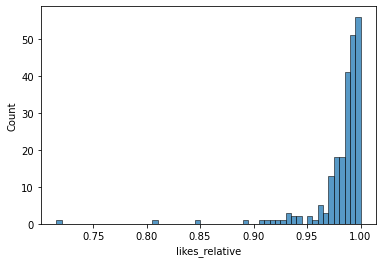

In [347]:
sns.histplot(data2_agg_video["likes_relative"])

#### Conclusion

There isn't a clear relationship. The most of videos have a relative number of likes > 90%. Anyways, i will select some:
1) Numbered titles (4 types, 6 lessons, etc)
2) Life and mental health (book recommendations, avoid mistakes).
3) Sucess study case/tips.
* Project reviews is hibrid with relative likes and dislikes

<a id="110"></a>
### Q10: What videos produces more relative dislikes?

#### Analysis

In [346]:
mask_justice = (data2_agg_video["view_count"]>1000) & (data2_agg_video["dislike_count"]>0)
data2_agg_video["like_interaction"] = data2_agg_video["like_count"] + data2_agg_video["dislike_count"]
data2_agg_video["dislikes_relative"] = (data2_agg_video["dislike_count"]/data2_agg_video["like_interaction"])
data2_agg_video.sort_values(["dislikes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","dislikes_relative","like_interaction","view_count","like_count","dislike_count"]].head()

/tmp/ipykernel_12039/1250078507.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["dislikes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","dislikes_relative","like_interaction","view_count","like_count","dislike_count"]].head()


video_id                                              title  \
103  HJH0gfY6EUg  Reviewing Your Data Science Projects - Episode...   
151  _K6cNdgN3CI  Reviewing Your Data Science Projects - Episode...   
72   3Mm1U1CbzNw                     Is Data Science Right For You?   
154  mR2NCRgtLPE  Reviewing Your Data Science Projects - Episode...   
35   n3vw0M5RrPU                         How I Learned Data Science   

     dislikes_relative  like_interaction  view_count  like_count  \
103           0.284495               703       20655         503   
151           0.190698               215       10762         174   
72            0.153078              1202       44051        1018   
154           0.106383               188        5504         168   
35            0.091435              2767       87169        2514   

     dislike_count  
103            200  
151             41  
72             184  
154             20  
35             253

#### Conclusion

- The reviews of data science projects (at least that 3) were not well received.
- The video: Is Data Science Right For You.

<a id="111"></a>
### Q11: What videos produces more relative comments added?

#### Analysis

In [245]:
mask_justice = (data2_agg_video["view_count"]>1000)
data2_agg_video["comments_relative"] = data2_agg_video["comment_count"]/data2_agg_video["view_count"]
data2_agg_video.sort_values(["comments_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","comment_count","comments_relative"]].head(10)

/tmp/ipykernel_12039/3549148697.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["comments_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","comment_count","comments_relative"]].head(10)


video_id                                              title  \
6    -3d1NctSv0c    Ken Jee Q & A Live Stream (50,000 Sub Special!)   
19   QN3wXPZSjpE  Do You Have a Data Science Mentor? (@Danny Ma)...   
9    742LQ38OioU  Data Science Productivity, Motivation, and Org...   
30   g7on3Rw0Ovg  Fast Cars to Faster Data (Alex Castrounis) - K...   
16   S_CuB__nsmI  Sports Analytics & Streaming Data Science on T...   
14   Kq9dkZu0bpg  Hedge Funds, Startups, and Data Science Oh my!...   
18   6aaIbd-GpZs  Should You Major in Data Science? (Jaemin Lee)...   
5    Xgg7dIKys9E  Interview with the Director of AI Research @ N...   
107  tnpV1etgcxs              The PODCAST you might have asked for?   
22   _rbrdNTpZGo  Building a Deep Learning BEAST (NVIDIA TITAN R...   

     comment_count  comments_relative  
6              317           0.136285  
19             172           0.078611  
9              246           0.066289  
30             118           0.064728  
16             209           0.047339  
14             213           0.031050  
18             173           0.029833  
5              329           0.024499  
107             39           0.021242  
22             158           0.020089

#### Conclusion

The most relative interaction happen when the video is interview like or with other person.

<a id="112"></a>
### Q12: What videos generates more social currency? (shares)

#### Analysis

In [246]:
mask_justice = (data2_agg_video["view_count"]>1000)
data2_agg_video["shares_relative"] = data2_agg_video["share_count"]/data2_agg_video["view_count"]
data2_agg_video.sort_values(["shares_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","share_count","shares_relative"]].head(10)

/tmp/ipykernel_12039/1525230239.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["shares_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","share_count","shares_relative"]].head(10)


video_id                                              title  \
8    4qZINLzwYyk  The State of Data Science with Krish Naik & Th...   
62   FqNpDNmpcEo  How Zillow Lost $500 MILLION With Machine Lear...   
7    Ip50cXvpWY4  The Best Free Data Science Courses Nobody is T...   
92   nrEJGGxcoTc             Is Your Phone REALLY Listening to You?   
76   YbTMIxjk4hI  The YouTube Algorithm EXPLAINED! (Tips from a ...   
64   rEWPqw6rMGI         The Only Data Science Explanation You Need   
154  mR2NCRgtLPE  Reviewing Your Data Science Projects - Episode...   
103  HJH0gfY6EUg  Reviewing Your Data Science Projects - Episode...   
178  ZWdyBbgGZBQ  Sports Analytics 101: The Pythagorean Theorem ...   
120  2OnXytYziF0                   What is Sports Analytics Really?   

     share_count  shares_relative  
8            544         0.027079  
62           309         0.018248  
7           4694         0.015793  
92            69         0.015102  
76            79         0.013860  
64           141         0.013720  
154           74         0.013445  
103          277         0.013411  
178           56         0.012894  
120          168         0.012611

<AxesSubplot:xlabel='shares_relative', ylabel='Count'>

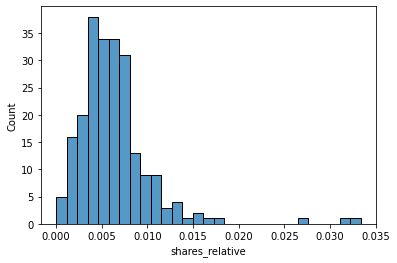

In [349]:
sns.histplot(data2_agg_video["shares_relative"])

#### Conclusion

No clear relationship. But:
- The courses recommendations were shared a lot.
- The most of the time people don't share the videos.

<a id="113"></a>
### Q13: What are the topics of the most liked comments?

#### Analysis

In [361]:
q13_top1000 = data3_comments.sort_values(["like_count"],ascending=False,axis=0).head(1000)
q13 = q13_top1000["comment_text"].values
print(len(q13))
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(q13)
q13_top1000.head()

1000


comment_text  \
2644  Don’t sugarcoat things, Ken. Just tell me I’m ...   
1159  01:20 - 1) Learn programming in python or R \n...   
2655  Despite of all these .. and  No matter how man...   
9885  4 Main Project Topics\n\n1. Regression\n2. Cla...   
8681  1.  you're in it for the Money\n2.  you don't ...   

                      comment_id  reply_count  like_count  \
2644  UgwS0PxjPVEuuZWwi2p4AaABAg            6         501   
1159  Ugw8EnIPyJ-YthQb6HF4AaABAg            6         346   
2655  UgyaNCHJi_JGyyXj-I14AaABAg           17         317   
9885  Ugwn6ouaeL5CQvOXeMN4AaABAg            3         267   
8681  UgxM30A41eY9EPJMQPZ4AaABAg            5         255   

                          date     video_id    user_id  sentiment  clusters  
2644 2021-04-09 14:36:28+00:00  sHRq-LshG3U  user_1574     -0.184         0  
1159 2021-08-30 00:07:14+00:00  4OZip0cgOho  user_1411      0.112         0  
2655 2021-04-09 13:13:30+00:00  sHRq-LshG3U  user_3468     -0.166         2  
9885 2020-02-18 17:16:14+00:00  8igH8qZafpo  user_1996      0.000         2  
8681 2020-05-25 05:48:15+00:00  m5pwx3hgtzM  user_4674     -0.186         2

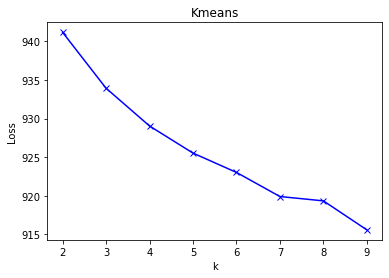

In [362]:

score = []
K = range(2,10)
for k in K:
   model = KMeans(n_clusters=k, max_iter=200, n_init=10)
   model = model.fit(X)
   score.append(model.inertia_)
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()

K means is not able to determine the topics (high loss and not convergence). So choose any number.

<AxesSubplot:xlabel='clusters', ylabel='Count'>

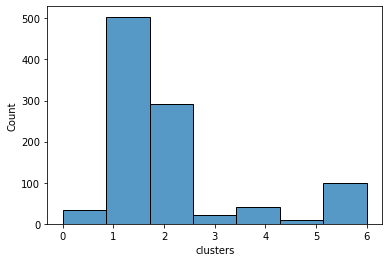

In [365]:
#Initiating the Agglomerative Clustering model 
n_clusters = 7
AC = AgglomerativeClustering(n_clusters=n_clusters)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X.toarray())
q13_top1000["clusters"] = yhat_AC
sns.histplot(q13_top1000["clusters"],bins=n_clusters)

In [368]:
q13_top1000[q13_top1000["clusters"] == 1].loc[:,["comment_text","sentiment","like_count","reply_count"]].head(10)

comment_text  sentiment  \
2644  Don’t sugarcoat things, Ken. Just tell me I’m ...     -0.184   
8681  1.  you're in it for the Money\n2.  you don't ...     -0.186   
8005  This feels like a cheat code or something. The...      0.405   
9221  Phew! I thought you were going to say "For the...      0.000   
9230  I started to study Python one week ago and is ...      0.466   
7762  I've never commented on a YouTube video before...      0.356   
9246  So cool to see someone with the same backgroun...      0.132   
9672  There's nothing quite like a video that shows ...      0.113   
6734  tl;dr of the video-\n\nStatistics\n-Probabilit...      0.000   
711   As someone who's a relatively new data scienti...      0.244   

      like_count  reply_count  
2644         501            6  
8681         255            5  
8005         190            1  
9221         186            2  
9230         144           12  
7762         128            1  
9246         119            4  
9672         109            3  
6734         104            4  
711          103            1

In [369]:
q13_top1000[q13_top1000["clusters"] == 2].loc[:,["comment_text","sentiment","like_count","reply_count"]].head(10)

comment_text  sentiment  \
1159  01:20 - 1) Learn programming in python or R \n...      0.112   
9885  4 Main Project Topics\n\n1. Regression\n2. Cla...      0.000   
6455                                    Hey that’s me 😃      0.000   
303   I used your project-based learning approach fr...      0.057   
2648  It's can very well be a "who you know" industr...      0.075   
1902  1) learn programming(python) \n2) get familiar...      0.046   
516   We sold our house to Zillow right before they ...      0.106   
3331  I started learning data science due to the hyp...      0.097   
8822  I think I may have just discovered the most us...      0.242   
695   When I was 12 years old, I wanted to learn HTM...     -0.039   

      like_count  reply_count  
1159         346            6  
9885         267            3  
6455         182            8  
303          120           10  
2648         113            1  
1902         105            6  
516           94            5  
3331          91           10  
8822          79            2  
695           70            4

In [370]:
q13_top1000[q13_top1000["clusters"] == 2].loc[:,"comment_text"].values

array(['01:20 - 1) Learn programming in python or R \n01:40 - 2) Learn basic statistics for data science \r\n01:58 - 3) Start projects as soon as you can (Kaggle)\n03:28 - 4) Take notes on what algorithms and packages others use\n03:46 - 5) Learn the source code for the algorithms and try to implement them from scratch\r\n04:48 - 6) Work on more advanced projects where you collect your own data or use advanced concepts like deep learning, nlp, or computer vision.',
       '4 Main Project Topics\n\n1. Regression\n2. Classification \n3. Clustering\n4. Deep Learning',
       'Hey that’s me 😃',
       "I used your project-based learning approach from last year's video to learn data science. After 15 months and 700 hours of learning (no online courses, just individual studying), I landed as job as a mid-level data scientist in financial fraud detection. Thank you! This video is spot-on. Especially your emphasis of building a roadmap and systematically updating it as you grow.\n\n2 not-obvio

#### Conclusion

Main clusters profiling:
- Cluster 0: Fun/random(?) comment.
- Cluster 1: Have enumerated lists, people talking about past and present (Example: i started learning x months ago..., Currently i...)

<a id="4"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">FINAL CONCLUSIONS and RECOMMENDATIONS</p>
[Return to table of contents](#top)

## <span style="color:#0affef">1) Increase video CTR.</span>

Improve thumbnails and titles:
- The mayority of videos don't use psychologica triggers.
- Use numbers (3,5,7,10) in titles. Avoid (2,4,6) because these may feel "incomplete".
- Use more action verbs.
- The use of emojis is almost scarce. One or two can be more attractive that only plain text.
- Best CTR titles used in channel are "Should you" or "* you *", beginner/started guide or specific projects. But for specific projects people leave when it's end, try to redirect them to videos with higher subscription rate (see the objective 2 below).
- Try to make a clean thumbnail with text color light (white,yellow,skyblue) over dark.
- Avoid low CTR titles that is about: lives and Q&A.
- Avoid color red in text over dark.
- Don't put multiple objects that sature the thumbnail.

- The best clusters (topics) of videos to get high CTR are: tutorial related, data science life (portfolio,daily,learning,etc.) and job related.

- There are little topics covered (Google search show a lot of intents in data science world that have no link to a youtube video).
- Expand and merge topics. Talk about a popular "mainstream" topic related to data science but in thumbnail let very clear that you will talk about machine learning/analytics or data science. For example: Crypto gets popular, talk about data science applied which people can take advantage of the situation. BUT REMEMBER: Doing this bruptly will cause some subscribers to unsubscribe, handlying a mainstream topic can help a lot to the channel in general, but it will annoy a number of followers. Do so with caution.

## <span style="color:#0affef">2) Increase Subscription Ratio.</span>

- First, link (using cards, pinned comments, description, etc) the videos with best CTR and avg watch time to the videos with best subscription rate. This way, the general subscription ratio will increase.

In [378]:
videos_best_ctr = q1_ctr_best.head(100)["title"].values
videos_best_avg_watch_time = q2_normal.head(100)["title"].values
videos_best_subscription_rate = q5_sr.iloc[2:,:].head(100)["title"].values
print("LINK some of engaging video\n", videos_best_ctr[0:3],"\n",videos_best_avg_watch_time[0:3])
print("\nWITH the best videos gaining subscriptions", videos_best_subscription_rate[0:3])
print("\nTo increase general subscribers gaining")

LINK some of engaging video
 ['Why I Quit Data Science' 'Should You Get A Masters in Data Science?'
 'Scrape Twitter Data in Python with Twitterscraper Module'] 
 ['What You Need to Know for a Data Science Internship'
 'Should You Learn R for Data Science?'
 'The 5 Stages of Learning Data Science']

WITH the best videos gaining subscriptions ['3 Proven Data Science Projects for Beginners (Kaggle)'
 "Why I'm Starting Data Science Over Again."
 'How to ULTRALEARN Data Science']

To increase general subscribers gaining


- The videos that get more subs are about: beginner instroduction to data science, experience if had to start again and recommendations related to data science (numbered are better, Example: 3 Reasons You Should NOT...). Also, recommendations are shared more often.
- The videos that get more un-subs are about: Q&A and channel announcements.
- The keywords are only a few. Is very important to expand this with "mainstream" topics.
- K.J. cover most of the search intents for data science. So, he probably want to solve more search.


- The top countries that watch and suscribe to channel are: US, IN, GB. Channel should pay attention to something in india?

## <span style="color:#0affef">3) Increase average watch time and get plain retention

When doing short videos think in doing:
- Expectations vs. Reality. But, warning: this may cause subscriptions lost (2-20 people).
- Use curiosity triggers like "The Secret..." and talk about something "unique".
- Use urgency triggers like "Why Right NOW is a Great Time...".
- Use the "Quick tip..." sinonimous.

When doing normal-long videos think in doing:
- Content about things we have/need to know "What You Need...". Be aware of repetitive click bait, a little portion of users really doesn't like that. Use click bait more hiddenly. 
- Use numbers and psychological triggers more often. 
- Things needed to start to do, are good topics. But try to not get repetitive.

## <span style="color:#0affef">4) Find suggestions.</span>

- Q&A, channel announcements are not well received.
Some users comment that:
- They don't like the clickbaity titles and "awkward" face in thumbnails. Since, show the face in thumbnails is a SEO strategy proven, you probably want to ignore that.
- Improve the audio/mic quality.
- Try to bring new information, not boring.
- Speak with a more natural/faster rhythm.
- Check links to discord (?).

## <span style="color:#0affef">5) Increase interaction.</span>

- The most relative interaction happen when the video is a interview like or with other person.
- The courses recommendations were shared a lot.
- Most liked videos are: Videos with numbered titles (4 types, 6 lessons, etc), Life and mental health (book recommendations, avoid mistakes) and Sucess study case/tips.
- The call to action (action verbs) are low. Use more, forr example: "learn", "discover", "control", "create", "find", "teach", "shows", "demonstrates", "get rid of", "imagine", "improve", "want", "get", "fulfill", "order", "organize", etc.

<a id="5"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>

[Return to table of contents](#top)